### 먼저 필요한 패키지를 가져옵니다.

In [153]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [154]:
abalone_columns= list()
for l in open('data/abalone_attributes.txt'):
    abalone_columns.append(l.strip())

abalone_columns

data = pd.read_csv('data/abalone.txt', header=None, names=abalone_columns)

In [155]:
label = data['Sex']  # 성별만 라벨링

In [156]:
data.head()   #앞(위) 5줄만 보기

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [157]:
data.shape  # 전체 개수는 4177 데이터 , 컬럼은 9개

(4177, 9)

In [158]:
del data['Sex'] #성별 컬럼은 삭제

In [159]:
data.head()  #성별 삭제된 것 확인

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [160]:
data.describe()   #데이터의 각 변수별 개수, 평균, 표준편차, 최대, 최소 등을 간단한 설명

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


## Min-Max 스케일링

In [162]:
data = (data - np.min(data)) / (np.max(data) - np.min(data))    # Min-Max 스케일링

In [163]:
data.head()   # 스케일링된 후 0~1사이로 표현됨

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


In [164]:
from sklearn.preprocessing import MinMaxScaler 

In [165]:
mMscaler = MinMaxScaler()

In [166]:
# mMscaler.fit(data)  #data를 적용시킬 때 fit

In [167]:
mMscaled_data = mMscaler.fit_transform(data) # 전환하고 동작시키는 transform과  처음fit을 합침

In [168]:
type(mMscaled_data)   # 넘파이 배열로..

numpy.ndarray

In [169]:
type(data)  #  위에 한 것은 판다스 배열..

pandas.core.frame.DataFrame

## Standard Scaling

In [170]:
from sklearn.preprocessing import StandardScaler
sdscaler = StandardScaler()

In [171]:
sdscaled_data =  sdscaler.fit_transform(data)

In [172]:
sdscaled_data

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.72621157,
        -0.63821689,  1.57154357],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.20522124,
        -1.21298732, -0.91001299],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.35668983,
        -0.20713907, -0.28962385],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.97541324,
         0.49695471, -0.28962385],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.73362741,
         0.41073914,  0.02057072],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  1.78744868,
         1.84048058,  0.64095986]])

In [173]:
!pip install imblearn    

In [174]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [175]:
ros = RandomOverSampler()
rus = RandomUnderSampler()

In [176]:
data.shape

(4177, 8)

In [177]:
oversampled_data, oversampled_label = ros.fit_resample(data, label)
oversampled_data = pd.DataFrame(oversampled_data, columns=data.columns)

In [178]:
oversampled_data.shape

(4584, 8)

In [179]:
oversampled_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286
...,...,...,...,...,...,...,...,...
4579,0.425676,0.403361,0.088496,0.098105,0.077001,0.077024,0.078226,0.214286
4580,0.263514,0.235294,0.053097,0.025146,0.018494,0.030283,0.028401,0.142857
4581,0.540541,0.521008,0.110619,0.192846,0.153329,0.155365,0.169905,0.285714
4582,0.344595,0.319328,0.057522,0.050469,0.038332,0.041475,0.048829,0.178571


In [180]:
undersampled_data, undersampled_label = rus.fit_resample(data, label)

In [181]:
undersampled_data.shape

(3921, 8)

In [182]:
from sklearn.datasets import make_classification
data, label = make_classification(
    n_samples=1000,
    n_classes=3,
    n_features=2,
    n_repeated=0,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.05, 0.15, 0.8],
    class_sep=1, 
    random_state=2022
)

In [183]:
data.shape

(1000, 2)

In [184]:
data

array([[-2.11117507,  0.70864868],
       [ 0.03908554, -2.1966176 ],
       [ 0.61063734, -1.29651695],
       ...,
       [-0.94729639, -1.26505046],
       [ 0.98391513, -1.8661851 ],
       [ 0.15128065,  2.68764856]])

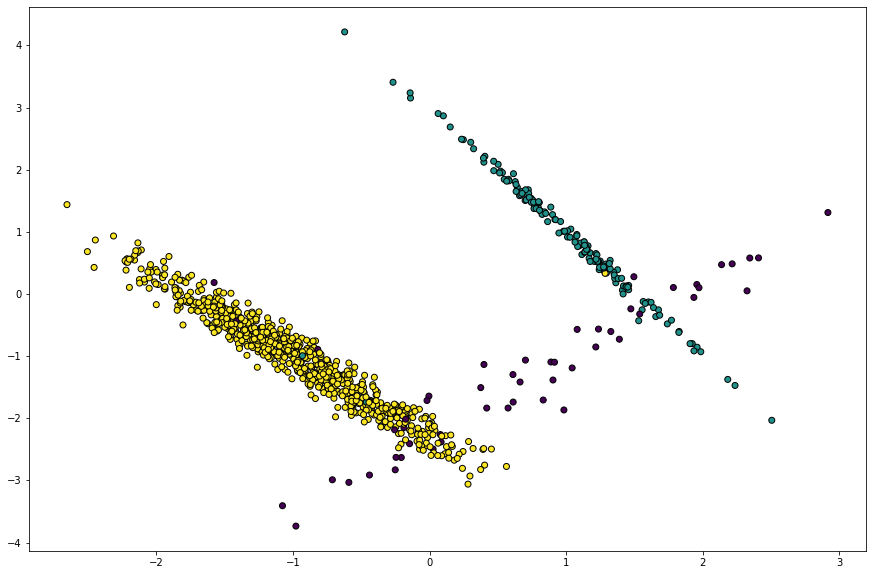

In [185]:
plt.scatter(data[:,0],data[:,1], c=label,linewidth=1, edgecolor='black')

In [186]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=5)

In [187]:
smoted_data, smoted_label = smote.fit_resample(data, label)

In [188]:
data.shape

(1000, 2)

In [189]:
smoted_data.shape

(2382, 2)

In [190]:
print('원본 데이터의 클래스 비율 \n{}'.format(pd.get_dummies(label).sum()))
print('\nSMOTE 결과 \n{}'.format(pd.get_dummies(smoted_label).sum()))

원본 데이터의 클래스 비율 
0     54
1    152
2    794
dtype: int64

SMOTE 결과 
0    794
1    794
2    794
dtype: int64


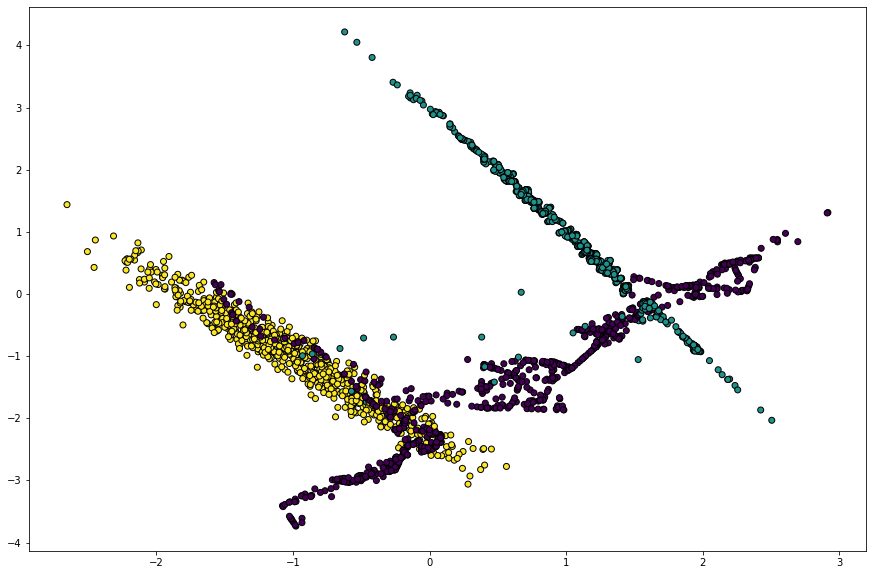

In [191]:
plt.scatter(smoted_data[:,0],smoted_data[:,1],
           c=smoted_label, linewidth=1, edgecolor='black')
                        

## Dimensionality Reduction 차원의 축소

In [192]:
from sklearn.datasets import load_digits

In [193]:
digits = load_digits()

In [194]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [195]:
digits.data.shape

(1797, 64)

In [196]:
data = digits.data
label = digits.target

Label : 0


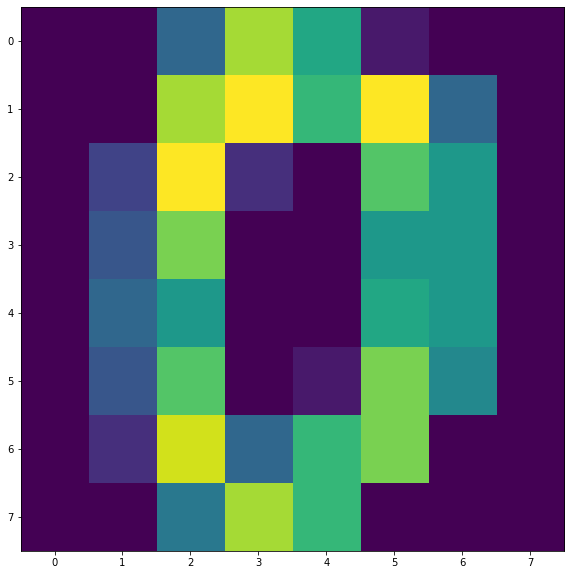

In [197]:
plt.imshow(data[0].reshape(8,8))
print('Label : {}'.format(label[0]))

## PCA (Principal Component Analysis) 주성분 분석

In [198]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [199]:
new_data = pca.fit_transform(data)

In [200]:
data.shape

(1797, 64)

In [201]:
new_data.shape   #차원을 축소

(1797, 2)

In [202]:
new_data[0]

array([-1.25946627, 21.27487676])

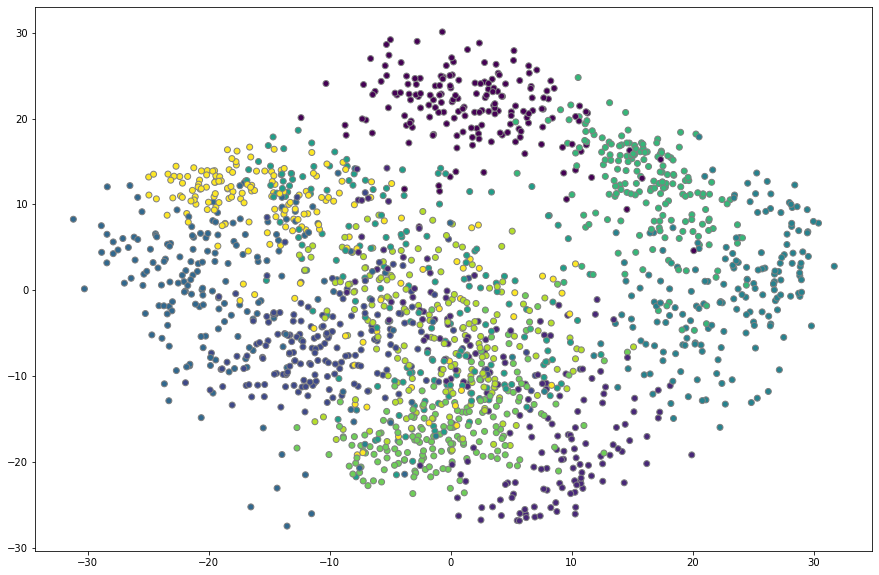

In [203]:
plt.scatter(new_data[:,0], new_data[:,1], c=label,
           linewidth=1, edgecolor='gray')

## Label Encoding

In [204]:
data = pd.read_csv('data/abalone.txt', header=None, 
                  names=abalone_columns)

In [205]:
label = data['Sex']

In [206]:
label.head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [207]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [208]:
label_encoded_label = le.fit_transform(label)
label_encoded_label.reshape(-1,1)

array([[2],
       [2],
       [0],
       ...,
       [2],
       [0],
       [2]])

In [209]:
result = pd.DataFrame(data = np.concatenate([label.values.reshape((-1,1)), 
                             label_encoded_label.reshape((-1, 1))], axis=1),
                             columns=['label', 'label_encoded']) 

In [210]:
result

,label,label_encoded
0,M,2
1,M,2
2,F,0
3,M,2
4,I,1
...,...,...
4172,F,0
4173,M,2
4174,M,2
4175,F,0


## One-hot Encoding

In [211]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [212]:
one_hot_encoded = ohe.fit_transform(label.values.reshape(-1,1))

In [213]:
print(one_hot_encoded)

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


 ## K-Means clustering

In [214]:
from sklearn.datasets import load_wine
wine =load_wine()

In [215]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [216]:
data = wine.data
label = wine.target
columns = wine.feature_names

In [217]:
data = pd.DataFrame(data, columns = columns)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [218]:
data.shape

(178, 13)

In [219]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [220]:
data

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [221]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)   #2차원으로 축소 PCA
data = pca.fit_transform(data)

In [222]:
data.shape

(178, 2)

In [223]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [224]:
kmeans.fit(data)

KMeans(n_clusters=3)

In [225]:
cluster = kmeans.predict(data)

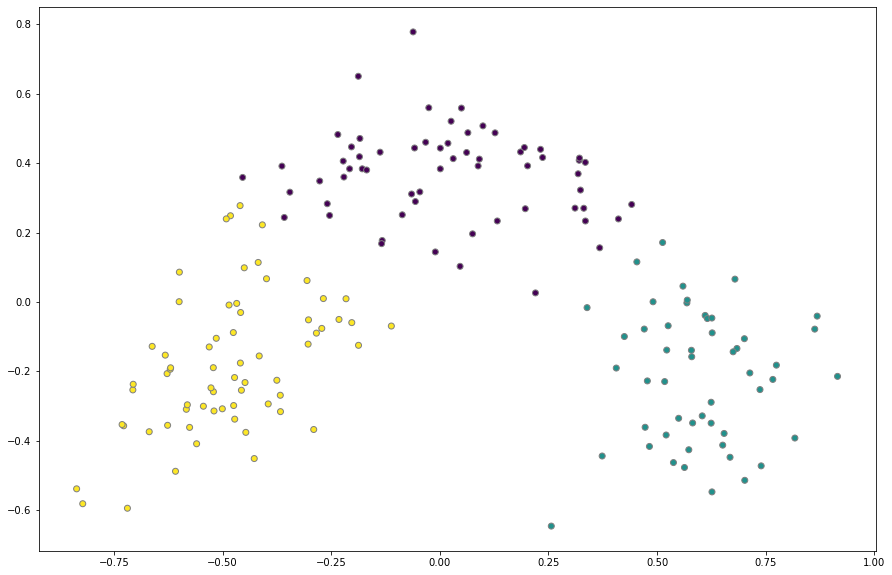

In [226]:
plt.scatter(data[:,0],data[:,1], c=cluster,
           linewidth=1, edgecolor='gray')

## Hierarchical clustering  (안함...4/12)

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [228]:
!pip install mglearn

(26, 2)


C:\Users\Ss\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


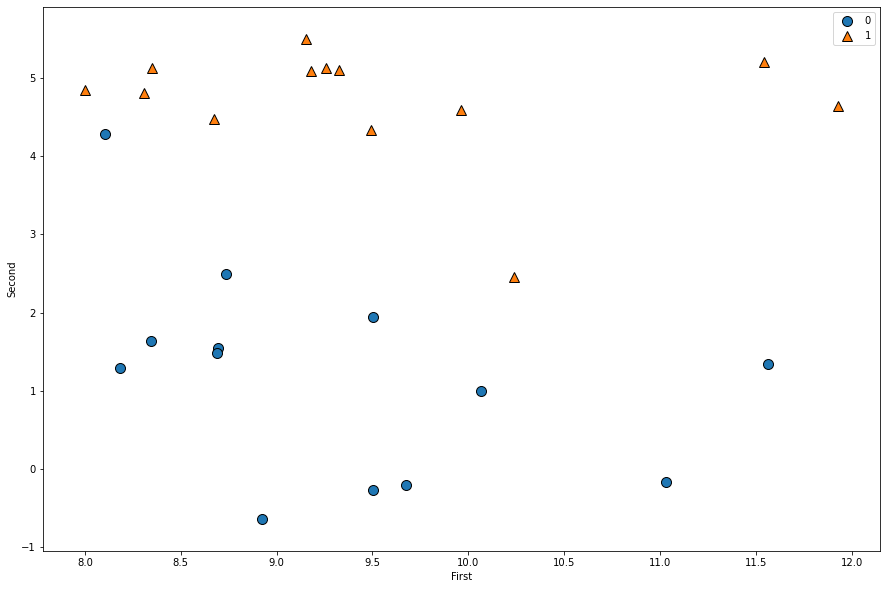

In [229]:
# 지도 학습 알고리즘
import mglearn
X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('First')
plt.ylabel('Second')
plt.legend()
print(X.shape)

(40, 1)


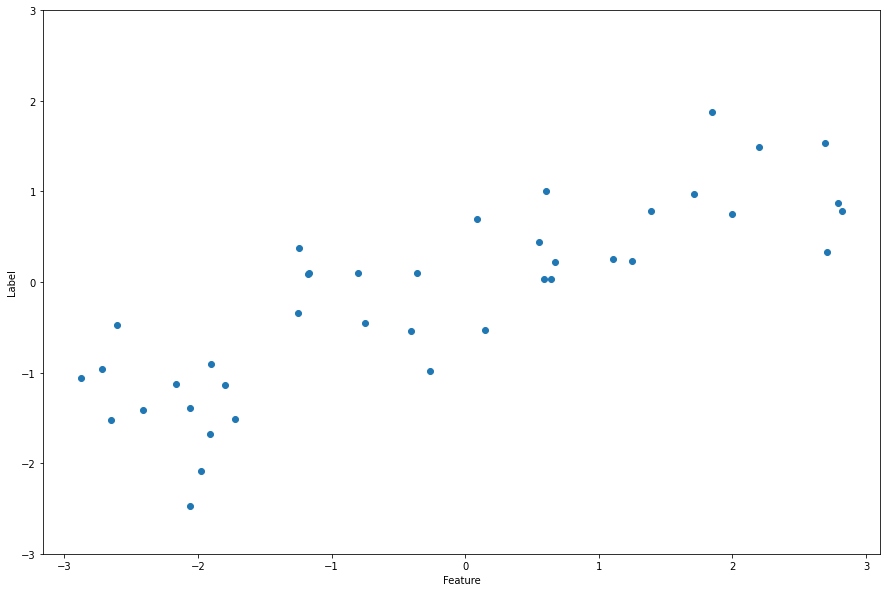

In [230]:
X, y = mglearn.datasets.make_wave(n_samples=40)

plt.plot(X,y, 'o')
plt.ylim(-3,3)

plt.xlabel('Feature')
plt.ylabel('Label')
print(X.shape)

In [231]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [232]:
cancer.data.shape

(569, 30)

In [233]:
#cancer.target    # malignant (양성)  # benign (음성)
#cancer.target_names
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

C:\Users\Ss\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


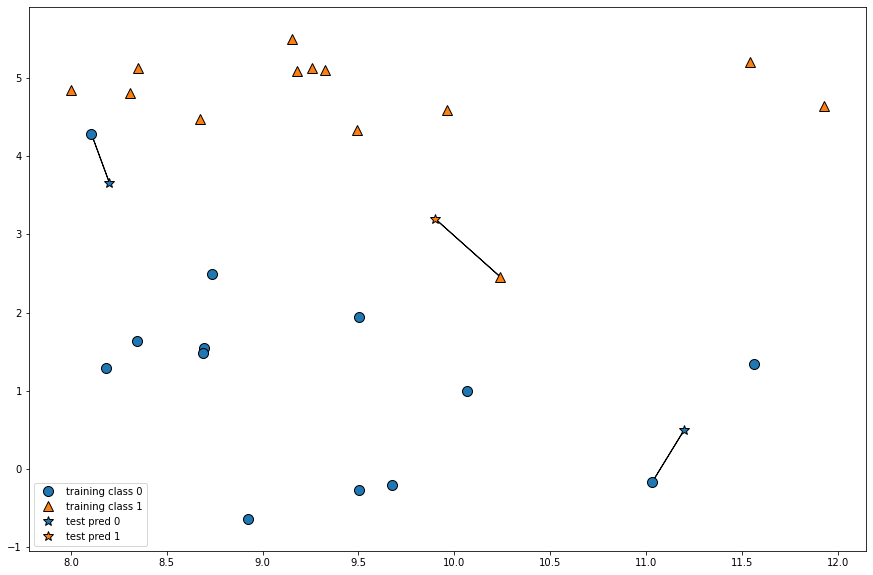

In [234]:
mglearn.plots.plot_knn_classification(n_neighbors=1)  #최근접 포인트 1개로 지정

C:\Users\Ss\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


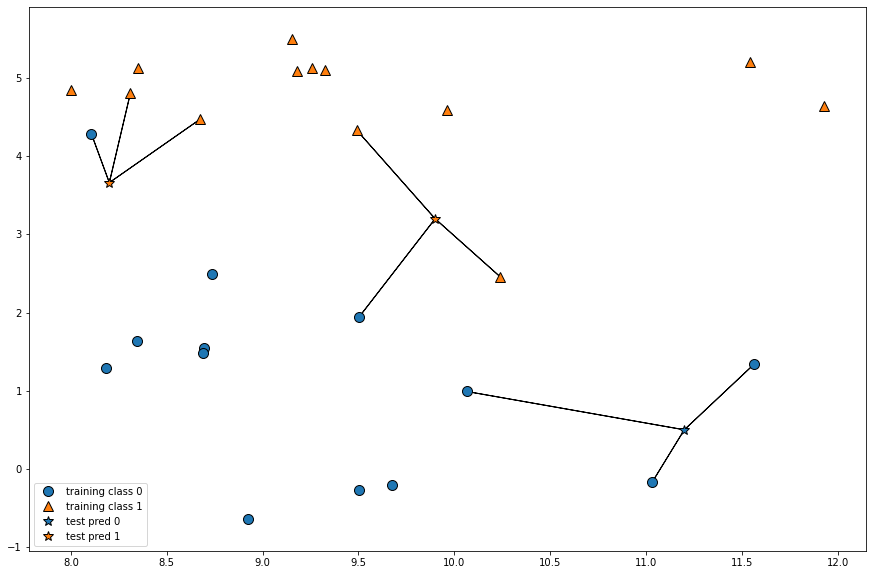

In [235]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [236]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\Ss\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [237]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)

In [238]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [239]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [240]:
clf.score(X_test, y_test)  #85.7%정도의 정확도가 되는 모델을 만들었다

0.8571428571428571

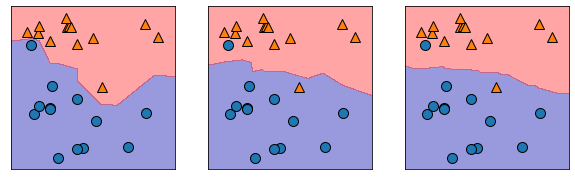

In [241]:
fig, axes = plt.subplots(1,3, figsize=(10, 3))
for n_neighbors, ax in zip([1,3,9], axes):

  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X, y)

  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax,
                                  alpha=0.4)
  mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)

In [242]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

In [243]:
print(training_accuracy)
print(test_accuracy)

[1.0, 0.9671361502347418, 0.9671361502347418, 0.9553990610328639, 0.9483568075117371, 0.9483568075117371, 0.9436619718309859, 0.9413145539906104, 0.9460093896713615, 0.9413145539906104]
[0.9230769230769231, 0.9020979020979021, 0.9230769230769231, 0.916083916083916, 0.916083916083916, 0.916083916083916, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091]


Text(0, 0.5, 'Accurancy')

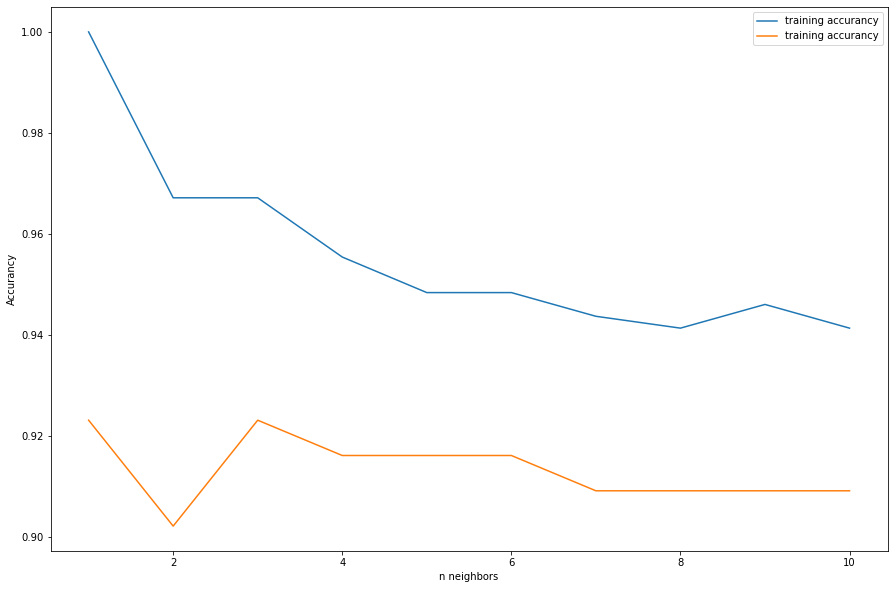

In [244]:
plt.plot(neighbors_settings, training_accuracy, label='training accurancy')
plt.plot(neighbors_settings, test_accuracy, label='training accurancy')
plt.legend()
plt.xlabel('n neighbors')
plt.ylabel('Accurancy')

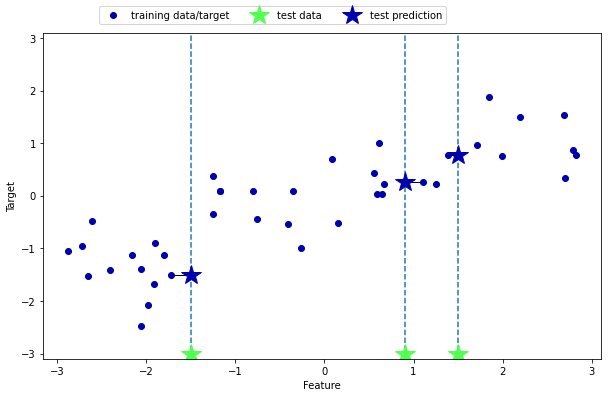

In [245]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

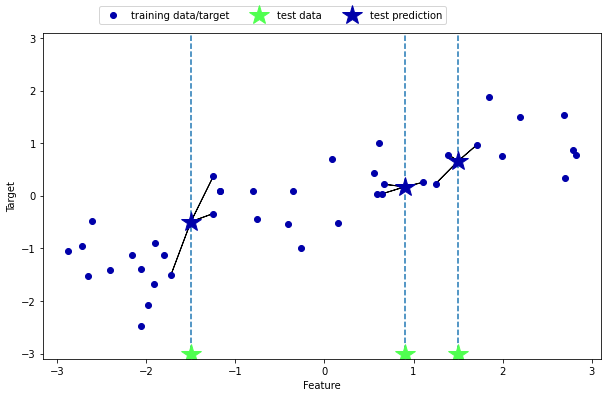

In [246]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [247]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [248]:
reg.predict(X_test)
reg.score(X_test, y_test)

0.8344172446249605

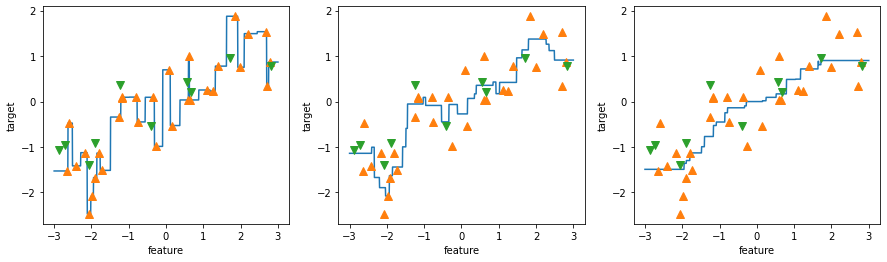

In [249]:
fig, axes = plt.subplots(1,3, figsize=(15,4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1,3,9], axes):
    
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', markersize=8)
    ax.plot(X_test, y_test, 'v', markersize=8)
    
    ax.set_xlabel('feature')
    ax.set_ylabel('target')

w[0]: 0.393906  b: -0.031804


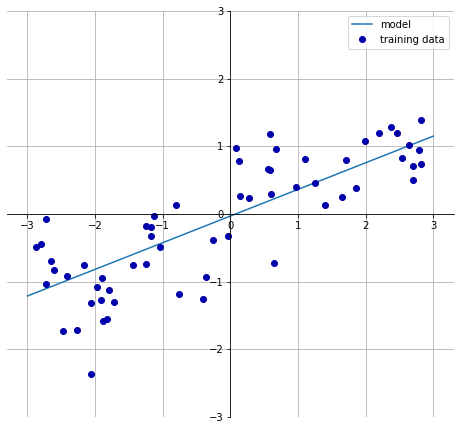

In [250]:
mglearn.plots.plot_linear_regression_wave()

In [251]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression(). fit(X_train, y_train)

In [252]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.6700890315075756
0.65933685968637


In [253]:
print(lr.coef_)   # 기울기  (내부 변수들은 끝에 언더바 써줘야함.)
print(lr.intercept_)   #절편

[0.39390555]
-0.031804343026759746


In [254]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

C:\Users\Ss\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [255]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9520519609032729
0.6074721959665788


## Ridge 릿지

LinearRegressor의 단점을 보완하기 위해서 Ridge와 Lasso.(linear model 개선시킨 것)

overfitting 개선가능, 0에 가까워지지만 0이 되진 않는다.

L2 제약조건이란? 모든 특성에 대한 가중치의 값을 0주변으로 위치하도록 제어하는 제약.

alpha의 값↑=제약↑▶모든 특성들의 가중치 값이 0에서 멀어짐▶결국 LinearRegressor클래스와 동일해짐

alpha의 값↓=제약↓▶모든 특성들의 가중치 값이 0주변으로 위치

In [256]:
# Ridge /릿지
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8857966585170939
0.7527683481744754


In [257]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print(ridge10.score(X_train, y_train))
print(ridge10.score(X_test, y_test))

0.7882787115369616
0.6359411489177312


In [258]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print(ridge01.score(X_train, y_train))
print(ridge01.score(X_test, y_test))

0.9282273685001986
0.7722067936479813


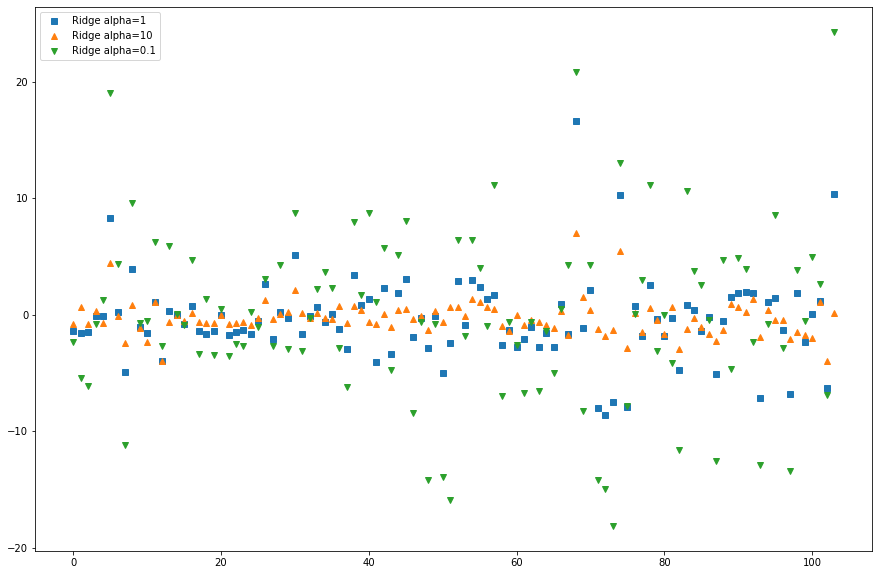

In [259]:
plt.plot(ridge.coef_,'s',label='Ridge alpha=1')
plt.plot(ridge10.coef_,'^',label='Ridge alpha=10')
plt.plot(ridge01.coef_,'v',label='Ridge alpha=0.1')

plt.legend()   # 제약을 얼마나 주냐에 따라 분포도의 편차가 커짐

## Lasso 라쏘 회귀
(least absolute shrinkage and selection operator)

정규화 선형회귀의 일종으로 선형회귀 계수에 대한 제약 조건을 추가하여 모델이 과도하게 최적하는 현상(과적합, overfitting)을 막는 방법

-feature를 감소시켜 구불구불한 직선을 펴주며 정규,결국 중요한 feature만 쓰겠다는 것

L1제약조건? coefficient를 0으로 잡아주는 게 아니라 별로 중요치 않은 항목(특성,컬럼)의 coefficient를 0으로 해버리는 것.
특성이 너무 많은 데이터를 다룰 때 유용. feature selection을 해주는 녀석.

alpha ↑ ▶ L1제약 ↑

alpha ↓ ▶ L1제약 ↓



In [260]:
# Lasso / 라쏘 회귀
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.29323768991114607
0.20937503255272294


In [261]:
#lasso001= Lasso(alpha=0.01).fit(X_train,y_train) #살짝 제약을 줘도 결과가 좋아짐
lasso001= Lasso(alpha=0.01, max_iter=50000).fit(X_train,y_train)  # 5만번 안에 돌아오겠다는 옵션(반복횟수 제한)

In [262]:
print(lasso001.score(X_train, y_train))
print(lasso001.score(X_test, y_test))

0.8962226511086497
0.7656571174549983


In [263]:
#lasso00001= Lasso(alpha=0.0001).fit(X_train,y_train)
lasso00001= Lasso(alpha=0.0001, max_iter=50000).fit(X_train,y_train) #웬만하면 5만번 한계치까지로

print(lasso00001.score(X_train, y_train))
print(lasso00001.score(X_test, y_test))

0.9507158754515467
0.6437467421272709


In [264]:
#lasso0= Lasso(alpha=0).fit(X_train,y_train)   #제약이 없다. 0 
lasso01= Lasso(alpha=0.1).fit(X_train,y_train)

print(lasso01.score(X_train, y_train))
print(lasso01.score(X_test, y_test))

0.7709955157630054
0.6302009976110041


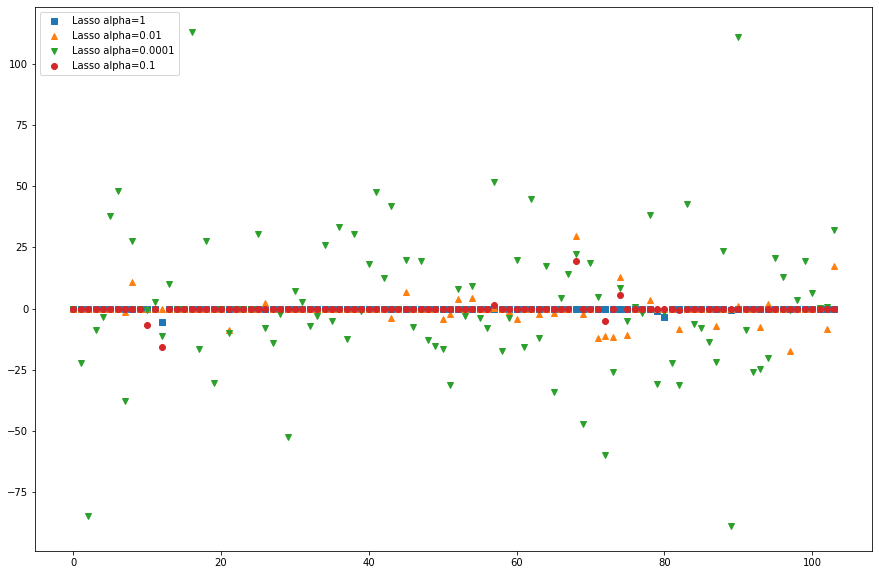

In [265]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1') #제약을 주니까 약한 애들은 0에 가까워져버림.
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')  #가장 활성화
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')
plt.plot(lasso01.coef_, 'o', label='Lasso alpha=0.1')
plt.legend()

# 분류에 대한 선형 모델

C:\Users\Ss\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


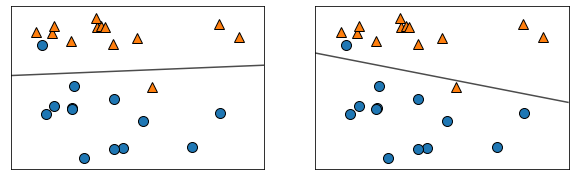

In [266]:
#분류에 대한 선형 모델   (리니어 & 로지스틱)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
  clf = model.fit(X, y)

  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, 
                                  alpha=0.7, ax=ax)
  mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    

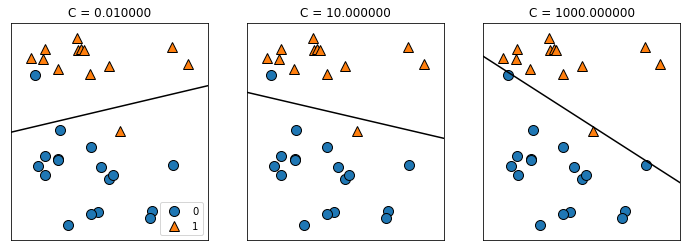

In [267]:
mglearn.plots.plot_linear_svc_regularization()   #정규화

In [268]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)   # 로지스틱리그리션, 5천번 제한, Default=1 (?)

print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.960093896713615
0.972027972027972


In [269]:
logreg100 = LogisticRegression(max_iter=5000, C=100).fit(X_train, y_train)  # C옵션 지정 100

print(logreg100.score(X_train, y_train))
print(logreg100.score(X_test, y_test))

0.9788732394366197
0.965034965034965


In [270]:
logreg001 = LogisticRegression(max_iter=5000, C=0.01).fit(X_train, y_train)  # C옵션  0.01

print(logreg001.score(X_train, y_train))
print(logreg001.score(X_test, y_test))

0.9460093896713615
0.972027972027972


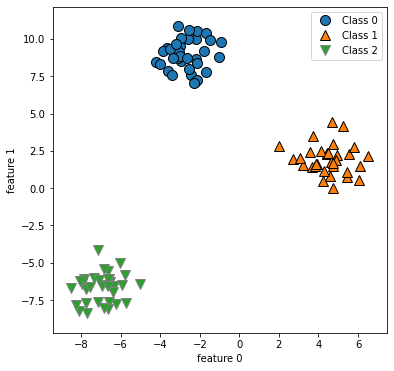

In [349]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42) # X=데이터, y=타겟
mglearn.discrete_scatter(X[:,0], X[:,1], y)

plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['Class 0','Class 1','Class 2'])

# LinearSVC

선형 모델의 주요 매개변수는 회귀모델에서는 alpha였고, 

LinearSVC와 LogisticRegression에서는 C였다.

alpha값이 클수록, C값이 작을수록 모델이 단순해진다.

보통 C와 alpha는 로그스케일로 최적치를 정한다.(1->0.01,10,10000)


그리고 L1규제를 사용할지 L2규제를 사용할지를 정해야 한다.

중요한 특성이 많지 않으면 L1을 사용하고, 그렇지 않으면 기본적으로 L2를 사용한다.

L1규제는 몇가지 특성만 사용하므로 모델에 중요한 특성이 무엇이고 효과가 어느정도인지 설명하기 쉽다.

선형 모델은 학습 속도가 빠르고 예측이 빠르다.또한 다른 모델에 비해 이해하기 쉽다.


In [272]:
linear_svm = LinearSVC().fit(X, y)     # 리니어 라인이 3개가 필요하다.

In [273]:
print(linear_svm.coef_)  # 3개의 선에 대한 기울기 값

[[-0.17492525  0.2314101 ]
 [ 0.47621379 -0.06937628]
 [-0.18914304 -0.20399615]]


In [274]:
print(linear_svm.coef_.shape)  # 모양 (계수 배열의 크기)
print(linear_svm.intercept_)   # 각 3개의 절편 (절편 배열의 크기)

(3, 2)
[-1.07745683  0.13140691 -0.08604819]


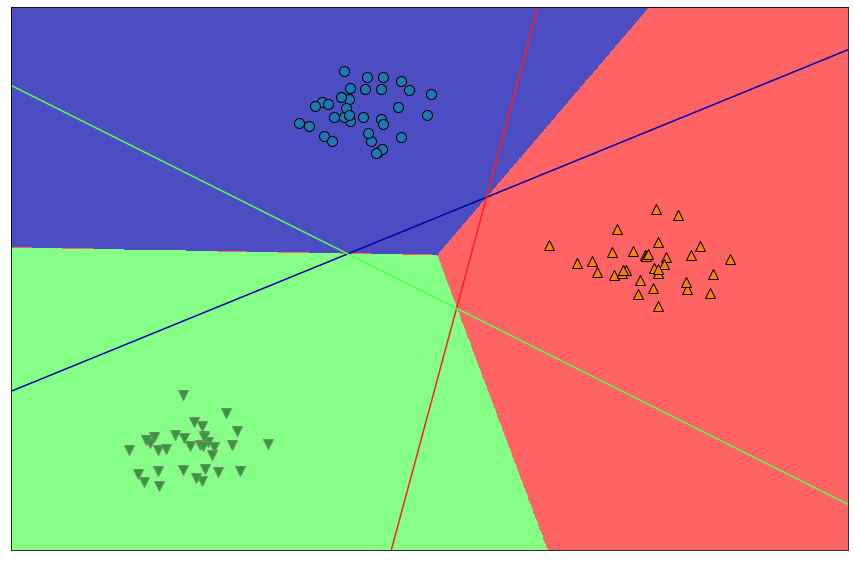

In [275]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)  # 여기서 alpha값은 투평도

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, 
                                    linear_svm.intercept_,
                                    mglearn.cm3.colors):
     plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)  # (x,y,색)= xw+b 공식


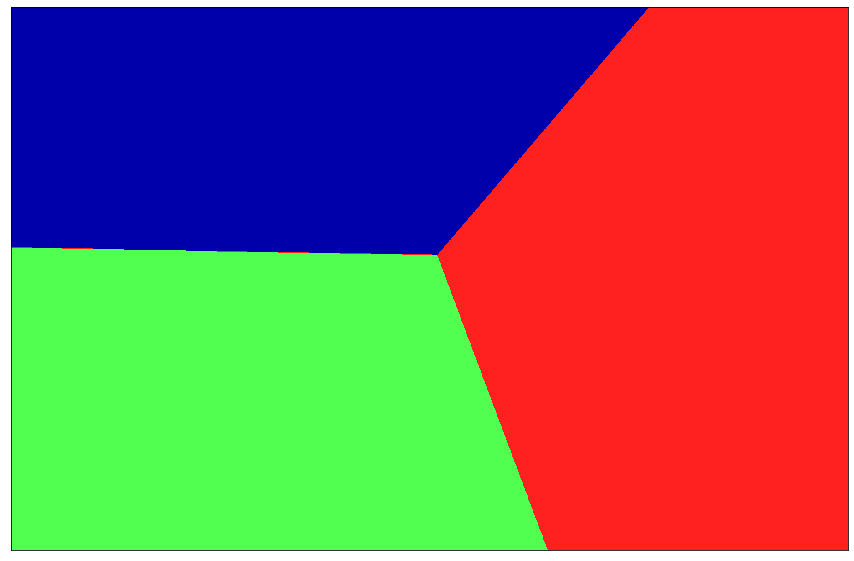

In [276]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True)

# Tree 계열 분류 알고리즘 

depth 를 결정해줘야 함.

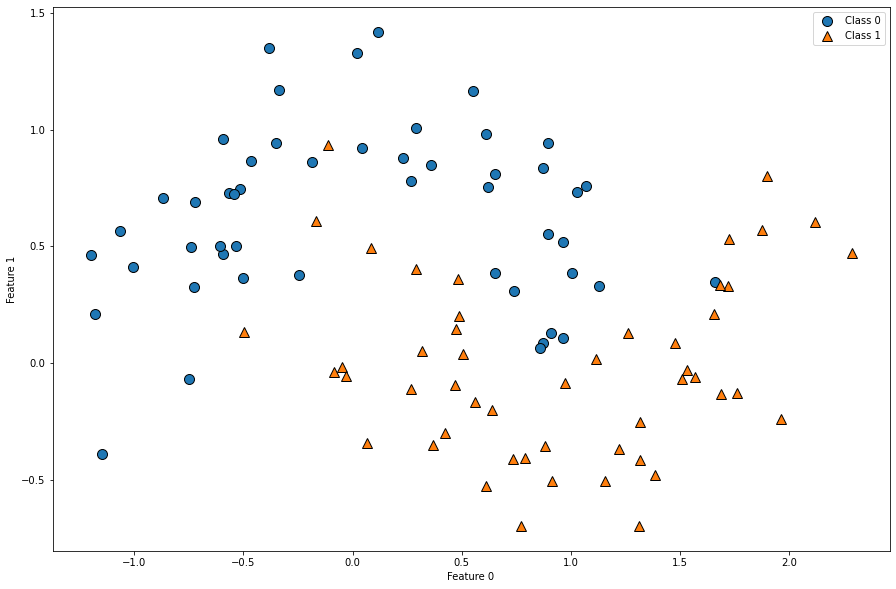

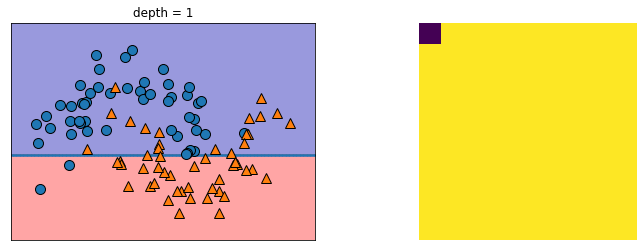

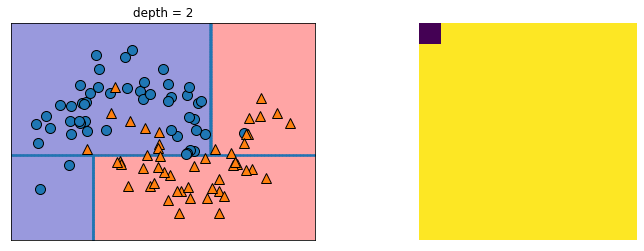

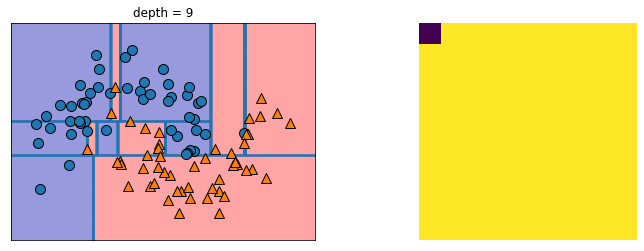

In [277]:
 # Tree 계열 분류 알고리즘

mglearn.plots.plot_tree_progressive()

# DecisionTreeClassifier 의사결정트리

In [278]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [327]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [328]:
print(tree.score(X_train, y_train))   #학습용 1 
print(tree.score(X_test, y_test))    #테스트용0.9

1.0
0.9300699300699301


In [329]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0) # 뎁스4로 주니 학습용은 떨어지고,테스트용은 오름
tree.fit(X_train, y_train)

print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))    #뎁스를 주니 테스트용 결과가 더 좋아짐

0.9953051643192489
0.951048951048951


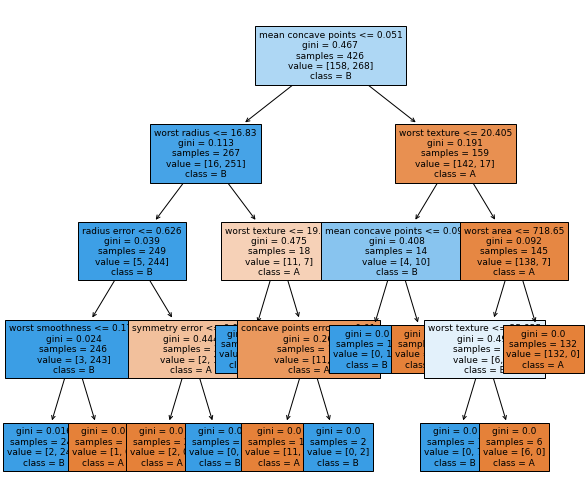

In [358]:
from sklearn.tree import plot_tree

plot_tree(tree, class_names=['A','B'], filled=True, fontsize=9, 
          feature_names=cancer.feature_names)
plt.rcParams['figure.figsize'] = [11, 7]

In [331]:
print(tree.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.73943775 0.         0.         0.013032   0.
 0.         0.         0.         0.         0.         0.01737208
 0.00684355 0.         0.06019401 0.11783988 0.         0.03522339
 0.01005736 0.         0.         0.         0.         0.        ]


# OS

Text(0, 0.5, 'Price')

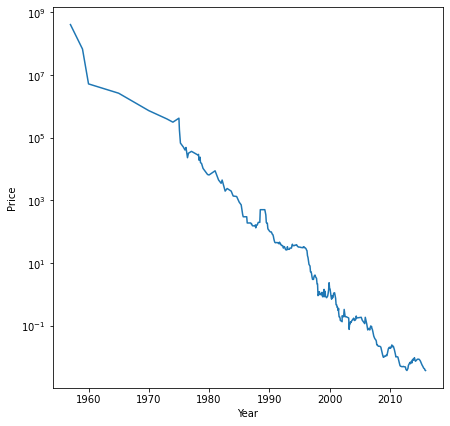

In [332]:
import os
ram_price = pd.read_csv('data/ram_price.csv')

plt.semilogy(ram_price.date, ram_price.price)
#plt.yticks(fontname = 'Arial') 10의 몇승 부분이 안뜨는 분들 설정하라고
plt.xlabel('Year')
plt.ylabel('Price')

In [333]:
ram_price

,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
...,...,...,...
328,328,2015.58,4.500000e-03
329,329,2015.67,4.300000e-03
330,330,2015.75,4.200000e-03
331,331,2015.83,3.800000e-03


In [334]:
from sklearn.tree import DecisionTreeClassifier

data_train = ram_price[ram_price.date < 2000]
data_test = ram_price[ram_price.date >= 2000]

In [335]:
# type(data_train.date)   # 시리즈 객체임을 확인..
type(data_train.date.to_numpy())  # 넘파이 배열로 형태를 뽑아줘야 함..

numpy.ndarray

In [336]:
X_train = data_train.date.to_numpy()[:,np.newaxis]  #reshape과 똑같은 결과가 나옴,새로운 축을 늘려줌

In [337]:
y_train = np.log(data_train.price)  #log 사용..

In [338]:
#X_train = data_train.date.to_numpy().reshape(-1,1)   # .reshape부분 안 넣고 밑에 트리 오류 안났음..

In [339]:
#y_train = data_train.price.to_numpy().reshape(-1,1)

In [318]:
 # from sklearn.linear_model import LinearRegression 코랩으로 빠진 분들은 넣어햐 함.
    
#tree = DecisionTreeClassifier().fit(X_train, y_train)  # 트리 모델
#linear_reg = LinearRegression().fit(X_train, y_train)   # 리니어 모델  나는 에러 안뜨던데...


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

In [319]:
X_all = ram_price.date.to_numpy()[:,np.newaxis]

In [320]:
pred_tree = tree.predict(X_all)  #'pred_tree'라는 변수에 저장
pred_lr = linear_reg.predict(X_all)

In [321]:
price_tree = np.exp(pred_tree)  # log값을 준 것을 다시 원래 값으로 되돌려줌 exp
price_lr = np.exp(pred_lr)

In [322]:
price_tree

array([4.11041792e+08, 6.79477250e+07, 5.24288000e+06, 2.64241200e+06,
       7.34003000e+05, 3.99360000e+05, 3.14573000e+05, 4.21888000e+05,
       1.80224000e+05, 6.75840000e+04, 4.99200000e+04, 4.07040000e+04,
       4.89600000e+04, 2.30400000e+04, 3.20000000e+04, 3.68000000e+04,
       2.80000000e+04, 2.94400000e+04, 1.92000000e+04, 2.40000000e+04,
       1.60000000e+04, 1.52000000e+04, 1.05280000e+04, 6.70400000e+03,
       6.48000000e+03, 8.80000000e+03, 4.47900000e+03, 3.52000000e+03,
       4.46400000e+03, 1.98000000e+03, 2.39600000e+03, 1.98000000e+03,
       1.37900000e+03, 1.33100000e+03, 8.80000000e+02, 7.20000000e+02,
       5.50000000e+02, 4.20000000e+02, 3.50000000e+02, 3.00000000e+02,
       3.00000000e+02, 3.00000000e+02, 3.00000000e+02, 3.00000000e+02,
       3.00000000e+02, 3.00000000e+02, 1.90000000e+02, 1.90000000e+02,
       1.90000000e+02, 1.90000000e+02, 1.90000000e+02, 1.90000000e+02,
       1.90000000e+02, 1.76000000e+02, 1.76000000e+02, 1.57000000e+02,
      

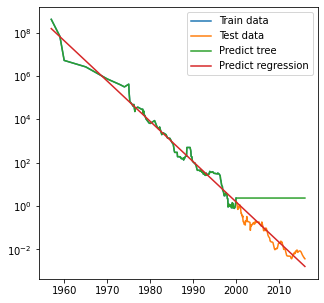

In [371]:
plt.semilogy(data_train.date, data_train.price, label='Train data')
plt.semilogy(data_test.date, data_test.price, label='Test data')
plt.semilogy(ram_price.date, price_tree, label='Predict tree')  # 트리 알고리즘. 한계치 확인.
plt.semilogy(ram_price.date, price_lr, label='Predict regression')
plt.legend()    #2000년 이후부터 테스트 되는게 보임

# RandomForestClassifier

In [372]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [373]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [374]:
forest= RandomForestClassifier(n_estimators=5, random_state=2) # 기본값은 100
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

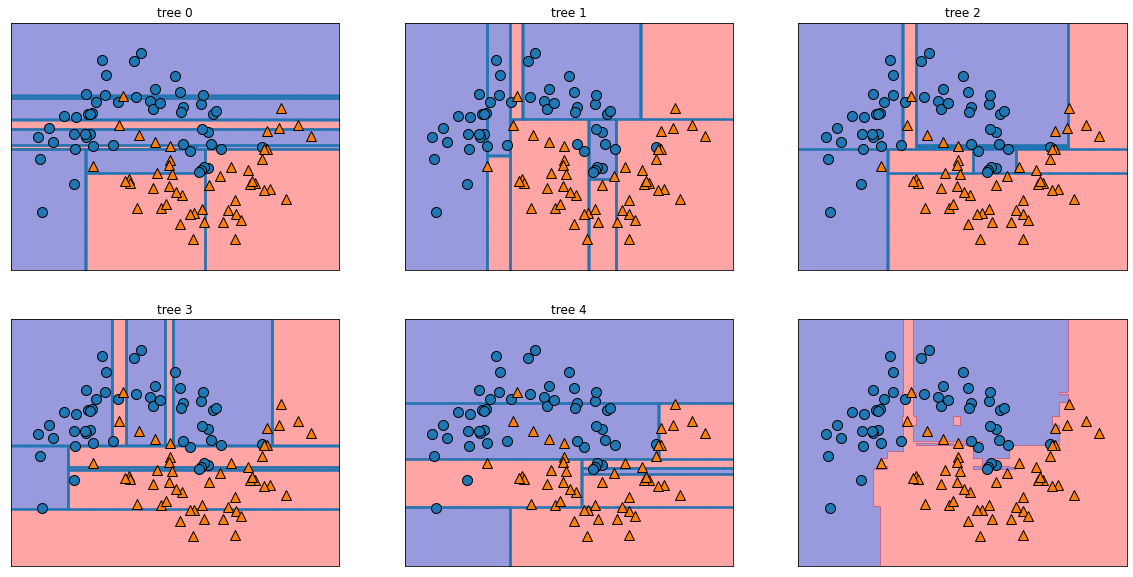

In [375]:
fig, axes = plt.subplots(2,3, figsize=(20,10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title('tree {}'.format(i))
  mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1],
                                alpha=0.4)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [376]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [377]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

1.0
0.972027972027972


In [378]:
plot_feature_importances_cancer(forest)

NameError: name 'plot_feature_importances_cancer' is not defined

# GradientBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier  # = GB
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    random_state=0)


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

In [ ]:
print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)  #depth 설정
gbrt.fit(X_train, y_train)

print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

In [379]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=1)  #learning_rate
gbrt.fit(X_train, y_train)

print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

NameError: name 'GradientBoostingClassifier' is not defined

In [380]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2   #나머지 버림% , 이제 4개에서 2개의 그룹으로 변경됨

Text(0, 0.5, 'feature 1')

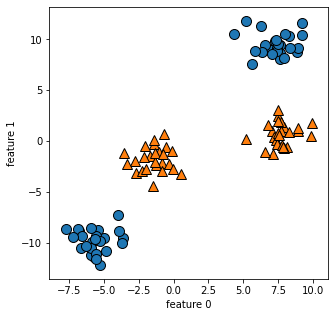

In [381]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

# SVC

C:\Users\Ss\AppData\Local\Temp/ipykernel_4012/2447728602.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


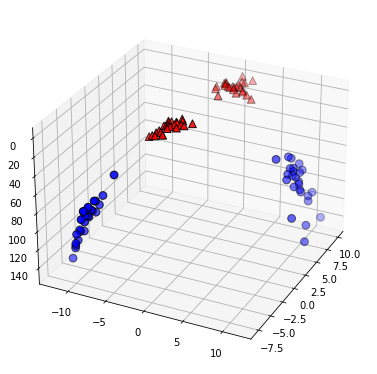

In [382]:
# 두 번째 특성을 제곱하여 추가합니다
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
cmap=mglearn.cm2, s=60, edgecolor='k')


In [384]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    random_state=0)
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)


SVC()

In [385]:
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.903755868544601
0.9370629370629371
